<a href="https://colab.research.google.com/github/kmrzakir/sms-spam-filter-2.0/blob/main/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is a simple SMS Classifier that checks whether a message is a spam or not**

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/spam.csv',encoding='latin1')

**Steps Which We Will Fallow**


1.   Data Cleaning
2.   EDA
3.  Text Preprocessing
4.  Model Building
5.  Evalvation
6.  Improvement
7.  Website
8.  Deploy

#**1 Data Cleaning**

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2009,ham,I can't keep going through this. It was never ...,NaN,NaN,NaN
2216,ham,OK i'm waliking ard now... Do u wan me 2 buy a...,NaN,NaN,NaN
2375,ham,Thanx 4 2day! U r a goodmate I THINK UR RITE S...,NaN,NaN,NaN
4323,ham,I am not having her number sir,NaN,NaN,NaN
4415,ham,V skint too but fancied few bevies.waz gona go...,NaN,NaN,NaN
3424,ham,True. Its easier with her here.,NaN,NaN,NaN
708,spam,To review and KEEP the fantastic Nokia N-Gage ...,NaN,NaN,NaN
1930,ham,Carry on not disturbing both of you,NaN,NaN,NaN
2335,ham,Which is weird because I know I had it at one ...,NaN,NaN,NaN
4018,spam,U've been selected to stay in 1 of 250 top Bri...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Drop Columns Unnamed: 2 , Unnamed: 3 and Unnamed: 4 Because are are almost null**

In [5]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [6]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Rename the Column Name's as they are not relivant**

In [7]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Do the label encoding of target column**

In [9]:
from sklearn.preprocessing import LabelEncoder
l1  = LabelEncoder()
df["target"] = l1.fit_transform(df["target"])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Check is any missing values**

In [11]:
df.isnull().sum()

,0
target,0
text,0


**Check from duplicated Row's and then remove them**

In [12]:
# This simply checks for duplicated row's
df.duplicated().sum()

np.int64(403)

In [13]:
# Remove duplicated rows
df.drop_duplicates(inplace=True)

**2. EDA**  
Means : understanding your data before doing ML


**Find the percentage of spam and not-spam emails**

In [14]:
df["target"].value_counts(normalize=True)*100

,proportion
target,
0,87.366996
1,12.633004


In [15]:
df["target"].value_counts()

,count
target,
0,4516
1,653


**Show a pie chard for target values**

In [16]:
import matplotlib.pyplot as plt


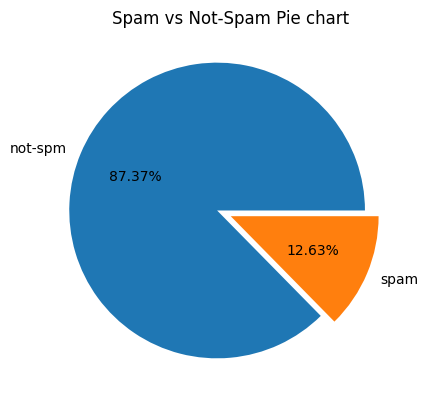

In [17]:
labels = ["Spam","Not-Spam"]
data = [30,20]
plt.pie(df["target"].value_counts(),labels=["not-spm","spam"],explode=[.1,0],autopct="%0.2f%%")
plt.title("Spam vs Not-Spam Pie chart")
plt.show()

**As we can we from above pie chat that our data is kind of imbalance**

**Now we will create new 3 columns one for number of characters, one for number of words and one fro number of sentences**

In [18]:
# import famous nlp libary
import nltk
# download some dependicies of nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
# Calculating the number of characters in every text
df["num_characters"] = df["text"].apply(len)

# Calculating the number of words in every text
from nltk.tokenize import word_tokenize
df["word_count"] = df["text"].apply(lambda x: len(word_tokenize(x)))

# Calculating the number of sentences in every text
from nltk.tokenize import sent_tokenize
df["sentence_count"] = df["text"].apply(lambda x: len(sent_tokenize(x)))

df.head()

,target,text,num_characters,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df[["num_characters","word_count","sentence_count"]].describe()

,num_characters,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# Describe only spam messages
df[df["target"] == 1][["num_characters","word_count","sentence_count"]].describe()

,num_characters,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
# Describe only not-spam messages
df[df["target"] == 0][["num_characters","word_count","sentence_count"]].describe()

,num_characters,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


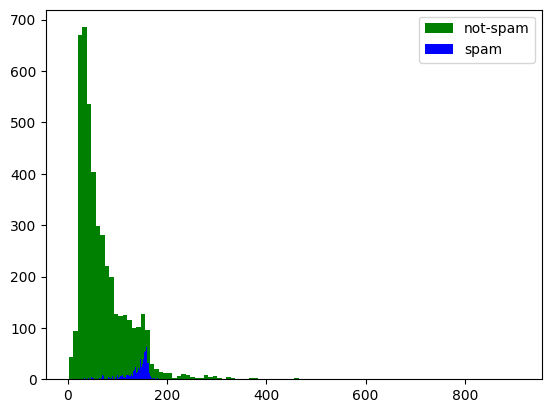

<Figure size 4000x1000 with 0 Axes>

In [23]:
plt.hist(df[df["target"] == 0]["num_characters"],bins=100,color="green")
plt.hist(df[df["target"] == 1]["num_characters"],bins=100,color="blue")
plt.legend(["not-spam","spam"])
plt.figure(figsize=(40,10))
plt.show()

**Drwa a pairplot that will show the relationship**

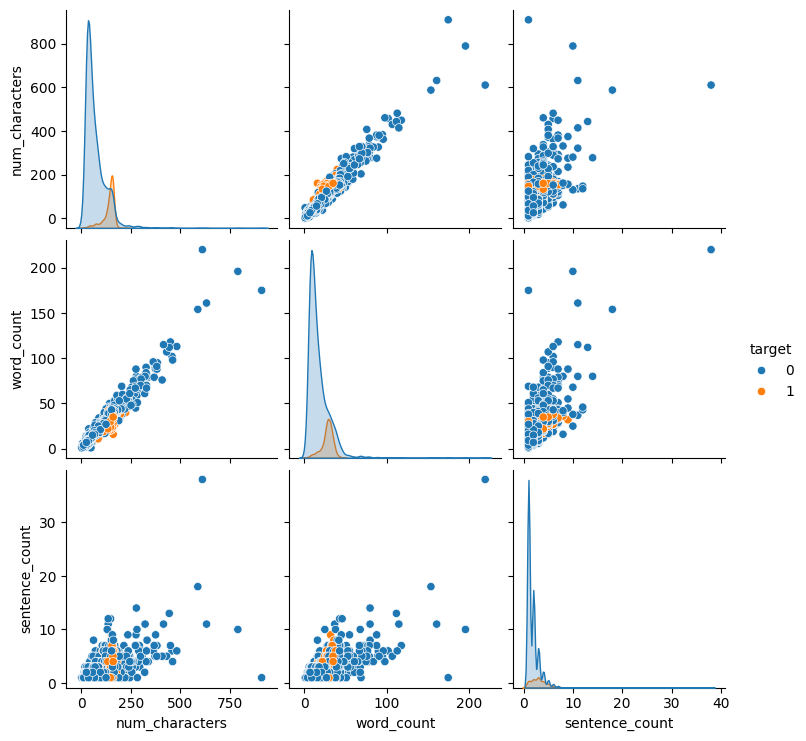

In [24]:
sns.pairplot(df,hue="target")

**Finding Corelation**

In [25]:
correlation_matrix = df[["target","num_characters","word_count","sentence_count"]].corr()
correlation_matrix

,target,num_characters,word_count,sentence_count
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
word_count,0.262912,0.965760,1.000000,0.679971
sentence_count,0.263939,0.624139,0.679971,1.000000


<Axes: >

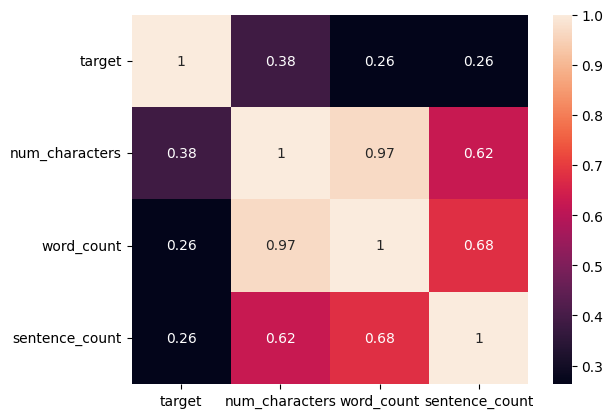

In [26]:
sns.heatmap(correlation_matrix,annot=True)


### **Now we will do Data Preprocessing**


1.   Convert text in lower-case
2.   Tokenization -> it splits the sentence into words and gives an array of words
3.   Remove Special Characters
4.   Remove Stop words (eg. a, is, the etc) and Punctuation.
5.   Stemming it cuts off suffixes like "-ing", "-ed", "-s" eg Change -> Chang or Studying -> Study


In [27]:
# Here i am creating a function that will do all these Data Preprocessing
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y =[]
  # removes the special characters
  for i in text:
    if i.isalnum():
      y.append(i)

  # remove stopwords
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  # now we will do Stemming
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))


  text = y
  return " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
transform_text(df["text"][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [29]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
# stemming a word here
print(ps.stem("nothing"))
print(ps.stem("running"))
print(ps.stem("running"))
print(ps.stem("running"))
print(ps.stem("caties"))

noth
run
run
run
cati


In [31]:
# Noew apply the transform_text() function and store it in new column transformed_text
df["transformed_text"] = df["text"].apply(transform_text)


In [32]:
df.head()

,target,text,num_characters,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Now simply show the text in wordcloud to which which word appreas more in text**

In [33]:
from wordcloud import WordCloud
text = "data science machine machine machine learning data python data"

wc = WordCloud(
    width=500,
    height=300,
    background_color="white"
)

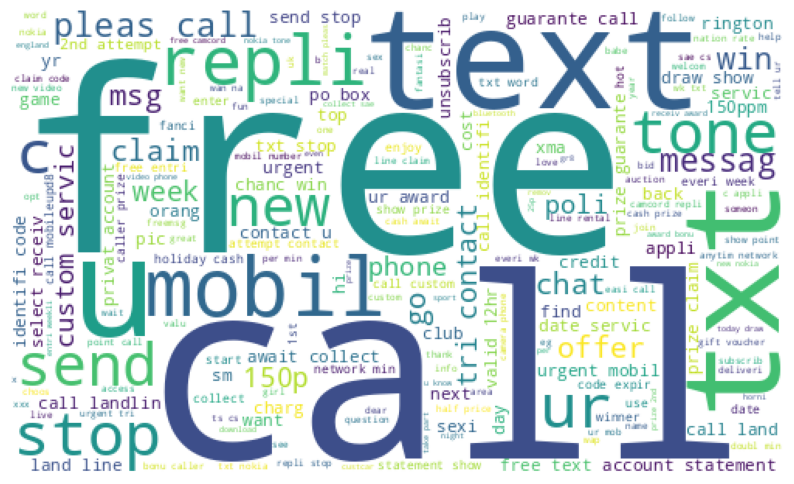

In [34]:
# wordcloud for spam messages
spam_text_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))

plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()


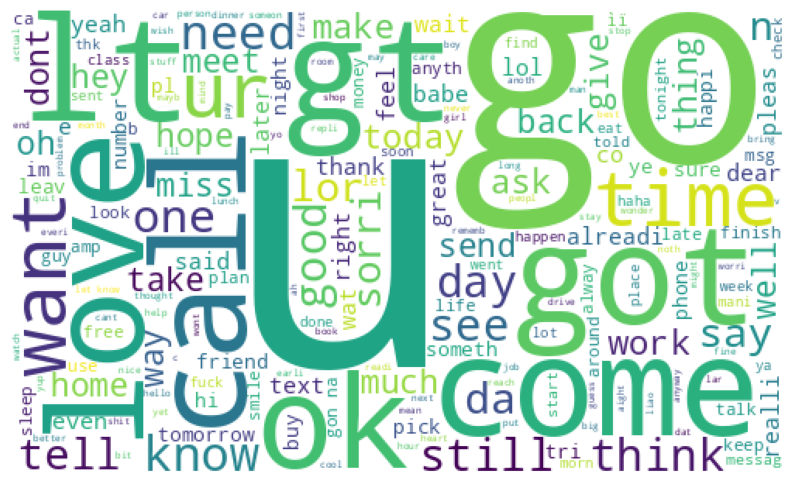

In [35]:
# wordcloud for not-spam "ham" messages
not_spam_text_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

**Now we will find the most 30 words used in spam and in not-spam text**

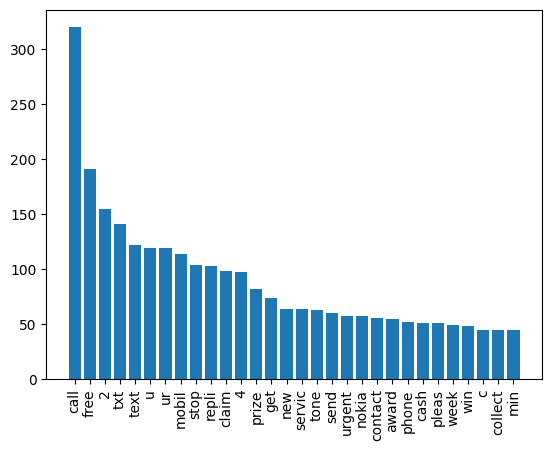

In [36]:
# first find the top 30 words of spam males
spam_words_list = []
for sentence in df[df["target"] == 1]["transformed_text"].tolist():
  for word in sentence.split():
    spam_words_list.append(word)

from collections import Counter
# get the top 30 most used words of spam messages with the occuring number also and then convert it into a Dataframe
top_30_spam_words = pd.DataFrame(Counter(spam_words_list).most_common(30))

x_axis = top_30_spam_words[0]
y_axis = top_30_spam_words[1]

plt.bar(x_axis,y_axis)
plt.xticks(rotation=90)   # ← makes labels vertical
plt.show()


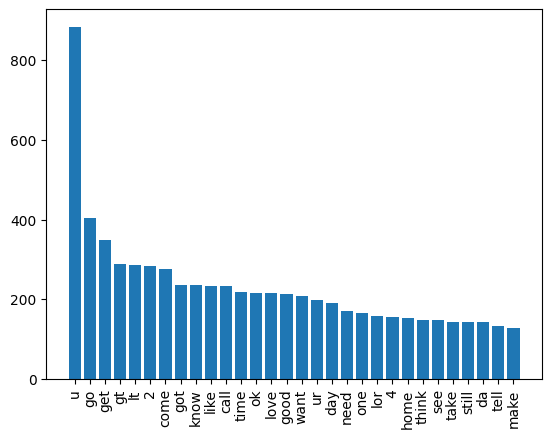

In [37]:
# first find the top 30 words of not-spam "ham" males
not_spam_words_list = []
for sentence in df[df["target"] == 0]["transformed_text"].tolist():
  for word in sentence.split():
    not_spam_words_list.append(word)


from collections import Counter
# get the top 30 most used words of not-spam messages with the occuring number also and then convert it into a Dataframe
top_30_not_spam_words = pd.DataFrame(Counter(not_spam_words_list).most_common(30))

x_axis = top_30_not_spam_words[0]
y_axis = top_30_not_spam_words[1]

plt.bar(x_axis,y_axis)
plt.xticks(rotation=90)   # ← makes labels vertical
plt.show()

#**From here we will build model**

In [38]:
df.head()

,target,text,num_characters,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
# conevt text into numerical form using BOW
from sklearn.feature_extraction.text import CountVectorizer


documents = [
    "I love AI",
    "You love AI"
]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df["transformed_text"]).toarray()

X.shape

(5169, 6708)

In [40]:
Y = df["target"]
Y.shape

(5169,)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score
# gaussian navi base
gnb = GaussianNB()
# MultinomialNB Navi base
mnb = MultinomialNB()
# BernoulliNB Navi base
bnb = BernoulliNB()

In [67]:
# Here we will cretae all there 3 models again but now we will use TfidfVectorizer instead of BOW to convert text in number
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df["transformed_text"]).toarray()
Y = df["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Accuracy :  0.874274661508704
Precession :  0.5181818181818182


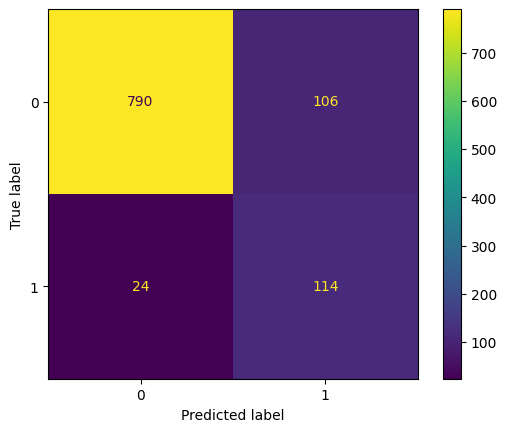

In [68]:
# firts build GaussianNB model
gnb.fit(X_train,Y_train)
Y_predict = gnb.predict(X_test)
print("Accuracy : ",accuracy_score(Y_test,Y_predict))
print("Precession : ",precision_score(Y_test,Y_predict))
cm = confusion_matrix(Y_test,Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Accuracy :  0.9709864603481625
Precession :  1.0


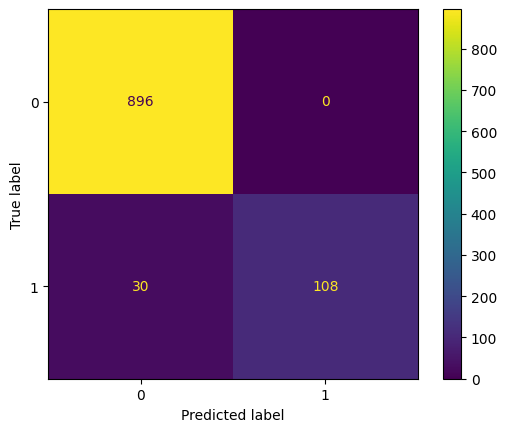

In [69]:
# firts build MultinomialNB model
mnb.fit(X_train,Y_train)
Y_predict = mnb.predict(X_test)
print("Accuracy : ",accuracy_score(Y_test,Y_predict))
print("Precession : ",precision_score(Y_test,Y_predict))
cm = confusion_matrix(Y_test,Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Accuracy :  0.9835589941972921
Precession :  0.991869918699187


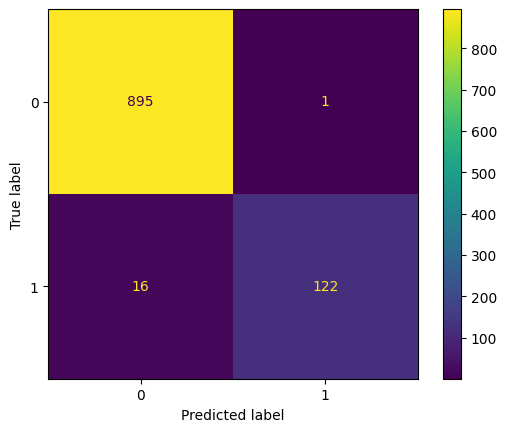

In [70]:
# firts build BernoulliNB model
bnb.fit(X_train,Y_train)
Y_predict = bnb.predict(X_test)
print("Accuracy : ",accuracy_score(Y_test,Y_predict))
print("Precession : ",precision_score(Y_test,Y_predict))
cm = confusion_matrix(Y_test,Y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Since precession matters in this case so we will go with MultinomialNB Navie Base as it gives good percession and especially whne we use TfidfVectorizer**

#**So or choice is GaussianNB**

**Now we will try other classification ml models and find how they will perform**

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel="sigmoid",gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear",penalty="l1")
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
xbc = XGBClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
mnb = MultinomialNB()

In [73]:
clfs = {"SVC":svc,"KNC":knc,"DTC":dtc,"LRC":lrc,"RFC":rfc,"GBC":gbc,"BC":bc,"ABC":abc,"XBC":xbc,"ETC":etc}

In [75]:
# function that will train a model
def train_model(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  Y_predict = clf.predict(X_test)
  accuracy = accuracy_score(Y_test,Y_predict)
  precession = precision_score(Y_test,Y_predict)
  return accuracy,precession

In [76]:
list_of_dict =[]
for key in clfs.keys():
  values = train_model(clfs[key],X_train,Y_train,X_test,Y_test)
  list_of_dict.append({"Model_tfv_3000":key,"Accuracy_tfv_3000":values[0],"Precession_tfv_3000":values[1]})


In [77]:
new_df = pd.DataFrame(list_of_dict)
new_df

,Model_tfv_3000,Accuracy_tfv_3000,Precession_tfv_3000
0,SVC,0.975822,0.974790
1,KNC,0.905222,1.000000
2,DTC,0.930368,0.830000
3,LRC,0.955513,0.960000
4,RFC,0.973888,0.982609
5,GBC,0.950677,0.930693
6,BC,0.958414,0.868217
7,ABC,0.921663,0.820225
8,XBC,0.968085,0.948718
9,ETC,0.974855,0.974576


In [93]:
new_df.drop(columns=["Model_tfv_3000"],inplace=True)

In [80]:
all_models_accuracy_precession_df_copy = all_models_accuracy_precession_df
all_models_accuracy_precession_df_copy

,Model,Accuracy,Precession
0,SVC,0.972921,0.974138
1,KNC,0.900387,1.000000
2,DTC,0.937137,0.854369
3,LRC,0.951644,0.940000
4,RFC,0.971954,1.000000
5,GBC,0.952611,0.923810
6,BC,0.958414,0.862595
7,ABC,0.924565,0.840909
8,XBC,0.974855,0.951613
9,ETC,0.972921,0.982456


In [95]:
result_table = pd.concat([all_models_accuracy_precession_df_copy,new_df],axis=1)
result_table

,Model,Accuracy,Precession,Accuracy_tfv_3000,Precession_tfv_3000
0,SVC,0.972921,0.974138,0.975822,0.974790
1,KNC,0.900387,1.000000,0.905222,1.000000
2,DTC,0.937137,0.854369,0.930368,0.830000
3,LRC,0.951644,0.940000,0.955513,0.960000
4,RFC,0.971954,1.000000,0.973888,0.982609
5,GBC,0.952611,0.923810,0.950677,0.930693
6,BC,0.958414,0.862595,0.958414,0.868217
7,ABC,0.924565,0.840909,0.921663,0.820225
8,XBC,0.974855,0.951613,0.968085,0.948718
9,ETC,0.972921,0.982456,0.974855,0.974576


In [96]:
result_table.sort_values(by="Precession",ascending=False)

,Model,Accuracy,Precession,Accuracy_tfv_3000,Precession_tfv_3000
1,KNC,0.900387,1.000000,0.905222,1.000000
4,RFC,0.971954,1.000000,0.973888,0.982609
9,ETC,0.972921,0.982456,0.974855,0.974576
0,SVC,0.972921,0.974138,0.975822,0.974790
8,XBC,0.974855,0.951613,0.968085,0.948718
3,LRC,0.951644,0.940000,0.955513,0.960000
5,GBC,0.952611,0.923810,0.950677,0.930693
6,BC,0.958414,0.862595,0.958414,0.868217
2,DTC,0.937137,0.854369,0.930368,0.830000
7,ABC,0.924565,0.840909,0.921663,0.820225


#**Final conclusion we will use select multinominal navie base algo**


In [98]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))